In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import nxviz as nv
import matplotlib.pyplot as plt
from nxviz import MatrixPlot, ArcPlot, CircosPlot
%matplotlib inline

In [2]:
df = pd.read_csv('liver_PPI.txt', sep='\t',names=['node1','node2'])

,node1,node2
0,CNBP,HNRNPAB
1,TRIAP1,BAG3
2,ATXN3,NSFL1C
3,TPI1,CCDC8
4,PSEN1,STT3B


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581422 entries, 0 to 581421
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   node1   581422 non-null  object
 1   node2   581422 non-null  object
dtypes: object(2)
memory usage: 8.9+ MB


In [3]:
G=nx.from_pandas_edgelist(df, "node1", "node2")

In [9]:
[e for e in G.edges];

In [14]:
# number of nodes
print('Number of nodes/vertex:', len(G.nodes()))
# number of relationships
print('Number of relationships/edges:', len(G.edges()))

Number of nodes/vertex: 11729
Number of relationships/edges: 581402


In [17]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 11729
Number of edges: 581402
Average degree:  99.1392


In [18]:
# Density
density = nx.density(G)
print("Network density:", density)

Network density: 0.008453208352287802


In [ ]:
# Network diameter
# If your Graph has more than one component, this will return False:
print(nx.is_connected(G))

# Next, use nx.connected_components to get the list of components,
# then use the max() command to find the largest one:
components = nx.connected_components(G)
largest_component = max(components, key=len)

# Create a "subgraph" of just the largest component
# Then calculate the diameter of the subgraph, just like you did with density.
#

subgraph = G.subgraph(largest_component)
diameter = nx.diameter(subgraph)
print("Network diameter of largest component:", diameter)

In [22]:
# add Degree dictionary
degree_dict = dict(G.degree(G.nodes()))
nx.set_node_attributes(G, degree_dict, 'degree')
# createdictionary of degrees
from operator import itemgetter
sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)

In [23]:
print("Top 20 nodes by degree:")
for d in sorted_degree[:20]:
    print(d)

Top 20 nodes by degree:
('YWHAE', 3420)
('APP', 2067)
('TRIM25', 1913)
('TP53', 1810)
('JUN', 1789)
('EGFR', 1777)
('ELAVL1', 1710)
('XPO1', 1534)
('YWHAZ', 1433)
('GRB2', 1398)
('ESR1', 1229)
('MYC', 1222)
('EP300', 1217)
('EED', 1215)
('CUL3', 1187)
('YWHAB', 1183)
('HSP90AA1', 1167)
('FN1', 1166)
('TRAF6', 1157)
('AKT1', 1112)


In [25]:
# Betweenness centrality
betweenness_dict = nx.betweenness_centrality(G) # Run betweenness centrality

# Assign each to an attribute in your network
nx.set_node_attributes(G, betweenness_dict, 'betweenness')

# sort
sorted_betweenness = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True)

print("Top 20 nodes by betweenness centrality:")
for b in sorted_betweenness[:20]:
    print(b)

KeyboardInterrupt: 

In [26]:
# Which high-betweenness centrality nodes had low degree - which nodes are unexpected?

#First get the top 20 nodes by betweenness as a list
top_betweenness = sorted_betweenness[:20]

#Then find and print their degree
for tb in top_betweenness: # Loop through top_betweenness
    degree = degree_dict[tb[0]] # Use degree_dict to access a node's degree, see footnote 2
    print("Name:", tb[0], "| Betweenness Centrality:", tb[1], "| Degree:", degree)

NameError: name 'sorted_betweenness' is not defined

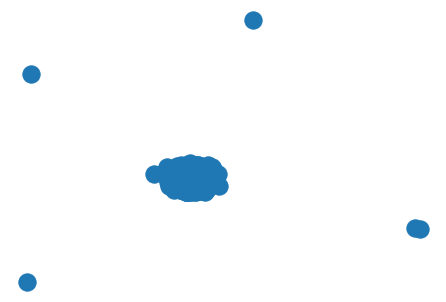

In [14]:
nx.draw(G)